### Segmentation

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
segmentation = torch.load('/home/steve/Documents/Semantic/PlanarReconstruction_ML3D/segmentations.pt')

In [3]:
segmentation = segmentation[3].reshape(192, 256, -1)
max_label = segmentation.shape[2] -1

RuntimeError: shape '[192, 256, -1]' is invalid for input of size 1

In [ ]:
#make sure its prob
sum_all_elements = torch.sum(segmentation)
sum_all_elements == 192 * 256

tensor(True)

In [ ]:
label_tensor = torch.argmax(segmentation, dim=-1)

/tmp/ipykernel_14310/2430057956.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max_label)  # Replace 'viridis' with any desired colormap


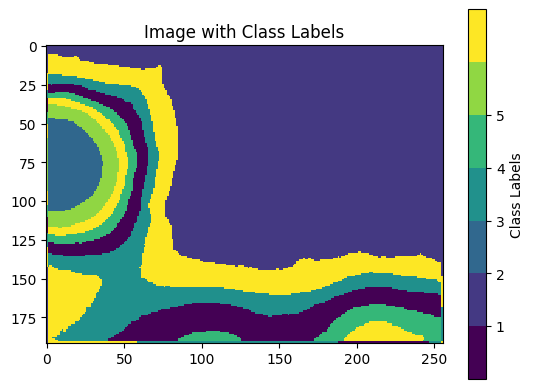

In [ ]:
cmap = plt.cm.get_cmap('viridis', max_label)  # Replace 'viridis' with any desired colormap

# Plot the image
plt.imshow(label_tensor.numpy(), cmap=cmap, interpolation='nearest', vmin=0, vmax=max_label)
plt.colorbar(ticks=np.arange(1, 6), label='Class Labels')
plt.title('Image with Class Labels')
plt.show()

### Semantic

In [4]:
semantic = torch.load('/home/steve/Documents/Semantic/PlanarReconstruction_ML3D/semantics.pt')
print(semantic.shape)

torch.Size([192, 256])


In [5]:
id_dict = {
 0: 'unknown',
 1: 'wall',
 2: 'floor',
 3: 'cabinet',
 4: 'bed',
 5: 'chair',
 6: 'sofa',
 7: 'table',
 8: 'door',
 9: 'window',
 10: 'bookshelf',
 11: 'picture',
 12: 'counter',
 13: 'blinds',
 14: 'desk',
 15: 'shelves',
 16: 'curtain',
 17: 'dresser',
 18: 'pillow',
 19: 'mirror',
 20: 'floor mat',
 21: 'clothes',
 22: 'ceiling',
 23: 'books',
 24: 'refridgerator',
 25: 'television',
 26: 'paper',
 27: 'towel',
 28: 'shower curtain',
 29: 'box',
 30: 'whiteboard',
 31: 'person',
 32: 'night stand',
 33: 'toilet',
 34: 'sink',
 35: 'lamp',
 36: 'bathtub',
 37: 'bag',
 38: 'otherstructure',
 39: 'otherfurniture',
 40: 'otherprop'}

In [6]:
def plot_semantic(semantics, colormap):
    cmap = plt.colormaps[colormap]
    semantics = semantics.detach().numpy()
    labels = np.vectorize(id_dict.get)(np.unique(semantics))
    colors = [cmap(i)[0:3] for i in range(len(np.unique(semantics)))]
    mapping = dict(zip(labels, colors))

    plt.imshow(np.transpose(np.vectorize(mapping.get)(np.vectorize(id_dict.get)(semantics)), (1,2,0)))
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in mapping.values()]
    plt.legend(markers, mapping.keys(), numpoints=1)
    plt.tight_layout()

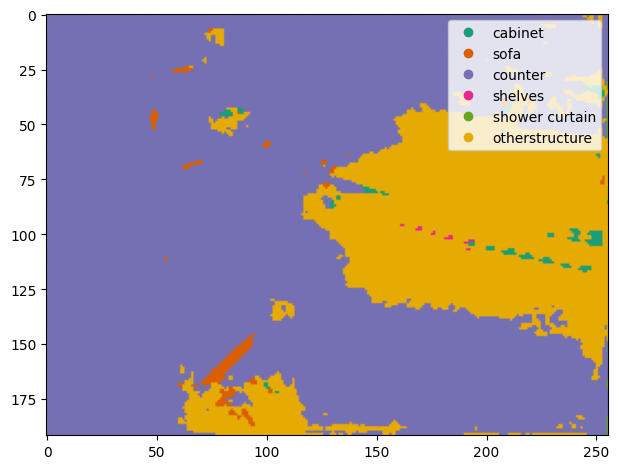

In [7]:
plot_semantic(semantic, 'Dark2')